Activity 6

- X-y split.
- Normalize (numerical).
- One Hot/Label Encoding (categorical).

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ## better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
# conda install openpyxl
## conda install xlrd

In [87]:
#load dataframe and remove "Unnamed" column
cs_df = pd.read_csv('Data copy/Data_Marketing_Customer_Analysis_Round2.csv')
cs_df.drop(cs_df.filter(regex="Unname"),axis=1, inplace=True)


In [88]:
#which columns are numerical?
numCols = cs_df.select_dtypes("number").columns
numCols = list(numCols)
numCols

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [105]:
# replace missing values with 0
cs_df["Income"].replace(0, np.nan, inplace=True)
cs_df["Customer Lifetime Value"].replace(0, np.nan, inplace=True)

In [90]:
#use boxplots to check for outliers among numerical columns

<AxesSubplot:>

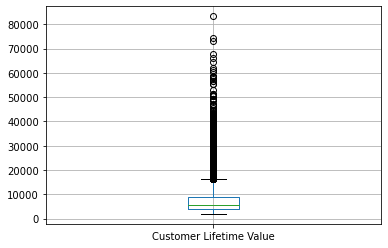

In [92]:
cs_df.boxplot('Customer Lifetime Value')

<AxesSubplot:>

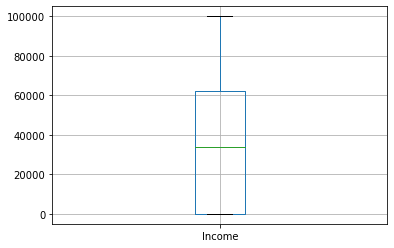

In [93]:
cs_df.boxplot('Income')

<AxesSubplot:>

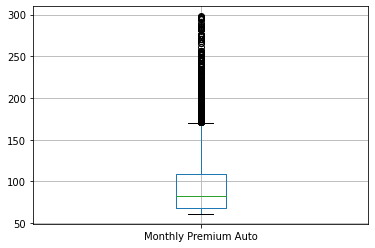

In [94]:
cs_df.boxplot('Monthly Premium Auto')

<AxesSubplot:>

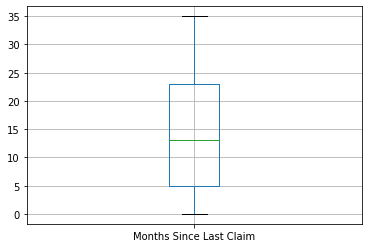

In [95]:
cs_df.boxplot('Months Since Last Claim')

<AxesSubplot:>

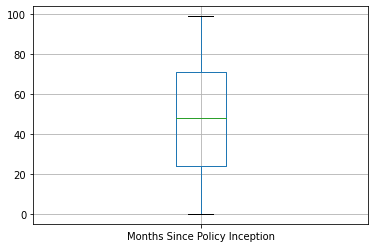

In [96]:
cs_df.boxplot('Months Since Policy Inception')

<AxesSubplot:>

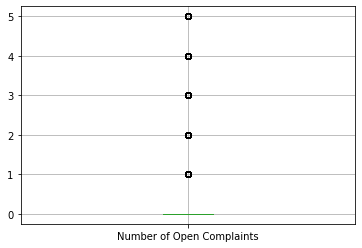

In [97]:
cs_df.boxplot('Number of Open Complaints')

<AxesSubplot:>

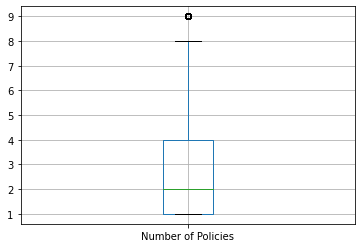

In [98]:
cs_df.boxplot('Number of Policies')

<AxesSubplot:>

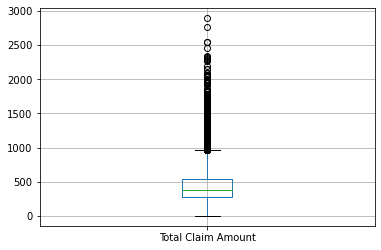

In [99]:
cs_df.boxplot('Total Claim Amount')

In [100]:
# X/Y Split target variable: 'Total Claim Amount'

X=cs_df.drop('Total Claim Amount', axis=1)
y=cs_df['Total Claim Amount']

In [101]:
# show numerical columns

X=X._get_numeric_data()
X

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,4809.216960,48029.0,61,7.0,52,0.0,9
1,2228.525238,0.0,64,3.0,26,0.0,1
2,14947.917300,22139.0,100,34.0,31,0.0,2
3,22332.439460,49078.0,97,10.0,3,0.0,2
4,9025.067525,23675.0,117,0.0,31,0.0,7
...,...,...,...,...,...,...,...
10905,15563.369440,0.0,253,0.0,40,0.0,7
10906,5259.444853,61146.0,65,7.0,68,0.0,6
10907,23893.304100,39837.0,201,11.0,63,0.0,2
10908,11971.977650,64195.0,158,0.0,27,4.0,6


array([[<AxesSubplot:title={'center':'Customer Lifetime Value'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Monthly Premium Auto'}>],
       [<AxesSubplot:title={'center':'Months Since Last Claim'}>,
        <AxesSubplot:title={'center':'Months Since Policy Inception'}>,
        <AxesSubplot:title={'center':'Number of Open Complaints'}>],
       [<AxesSubplot:title={'center':'Number of Policies'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

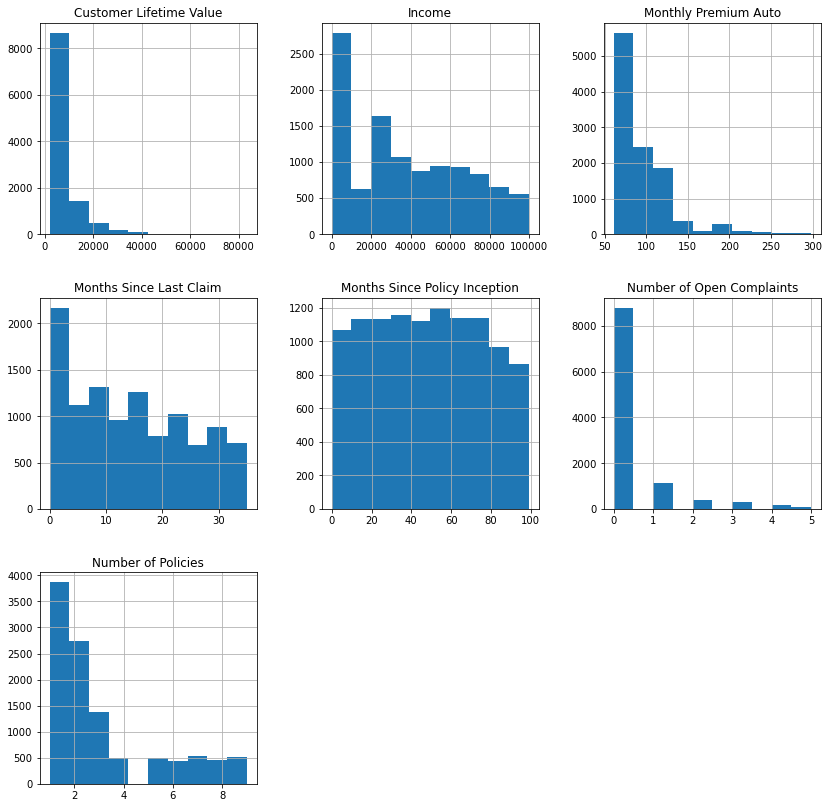

In [102]:
#plot all numerical columns

X.hist(figsize=(14,14))

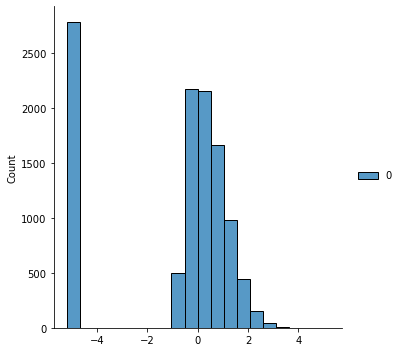

In [103]:
#QuantileTransformer
qt = QuantileTransformer(output_distribution="normal")
income_transformed=qt.fit_transform(cs_df['Income'].to_numpy().reshape(-1,1))
sns.displot(income_transformed)

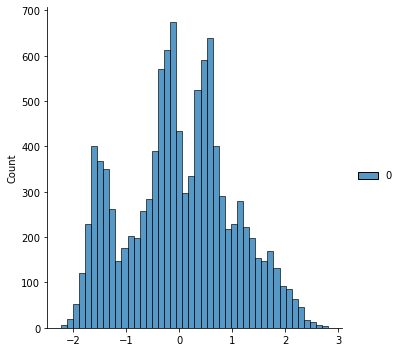

In [104]:
#use Power Transformer to tranform the variable into normal distributions as it is needed for modeling regression
#default is yeo-johnson, otherwise try box-cox (only for positive values)

pt = PowerTransformer(method='box-cox')
cust_life_val_transformed=pt.fit_transform(cs_df['Customer Lifetime Value'].to_numpy().reshape(-1,1))
sns.displot(cust_life_val_transformed)

In [75]:
pt.lambdas_

array([-0.34720961])

In [76]:
cs_df["cust_life_val_transformed"]= cust_life_val_transformed
cs_df.drop(['Customer Lifetime Value'],axis=1,inplace=True)

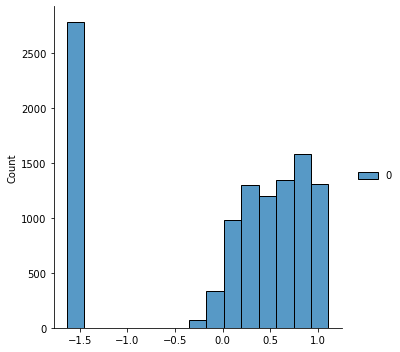

In [77]:
pt = PowerTransformer()
income_transformed=pt.fit_transform(cs_df['Income'].to_numpy().reshape(-1,1))
sns.displot(income_transformed)

In [78]:
pt.lambdas_

array([0.2732586])

In [80]:
cs_df["income_transformed"]= income_transformed
cs_df.drop(['Income'],axis=1,inplace=True)

KeyError: "['Income'] not found in axis"

In [ ]:
pt = PowerTransformer()
month_prem_auto_transformed=pt.fit_transform(cs_df['Monthly Premium Auto'].to_numpy().reshape(-1,1))
sns.displot(month_prem_auto_transformed)

In [ ]:
pt.lambdas_

In [ ]:
cs_df["month_prem_auto_transformed"]= month_prem_auto_transformed
cs_df.drop(['Monthly Premium Auto'],axis=1,inplace=True)

In [ ]:
pt = PowerTransformer()
month_last_claim_transformed=pt.fit_transform(cs_df['Months Since Last Claim'].to_numpy().reshape(-1,1))
sns.displot(month_last_claim_transformed)

In [ ]:
cs_df["months_last_claim_transformed"]= months_last_claim_transformed
cs_df.drop(['Months Since Last Claim'],axis=1,inplace=True)

In [ ]:
pt = PowerTransformer()
month_pol_inc_transformed=pt.fit_transform(cs_df['Months Since Policy Inception'].to_numpy().reshape(-1,1))
sns.displot(month_pol_inc_transformed)

In [ ]:
pt.lambdas_

In [ ]:
cs_df['months_policy_inc_transformed']= months_policy_inc_transformed
cs_df.drop(['Months Since Policy Inception'],axis=1,inplace=True)

In [ ]:
pt = PowerTransformer()
num_open_comp_transformed=pt.fit_transform(cs_df['Number of Open Complaints'].to_numpy().reshape(-1,1))
sns.displot(num_open_comp_transformed)

In [ ]:
pt.lambdas_

In [ ]:
pt = PowerTransformer(method='box-cox')

num_pol_transformed=pt.fit_transform(cs_df['Number of Policies'].to_numpy().reshape(-1,1))
sns.displot(num_pol_transformed)

In [ ]:
#QuantileTransformer
qt = QuantileTransformer(output_distribution="normal")
num_pol_transformed=pt.fit_transform(cs_df['Number of Policies'].to_numpy().reshape(-1,1))
sns.displot(num_pol_transformed)

In [ ]:
# Hot Coding Categorical Variables
# get a dataframe of binary entries for each value of the categorical column

In [ ]:
categoricals_features= cs_df.select_dtypes("object")
list(categoricals_features)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Customer"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["State"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Response"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Education"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Effective To Date"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["EmploymentStatus"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Gender"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Location Code"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Marital Status"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Policy Type"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Policy"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Renew Offer Type"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Sales Channel"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Vehicle Class"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Vehicle Size"], drop_first=True)

In [ ]:
categorical_cols=pd.get_dummies(categoricals_features["Vehicle Type"], drop_first=True)

In [ ]:
categoricals_features